# **<blockquote style="color:#0047AB; font-family: Arial, sans-serif;">DATA SCIENCE INTERN</blockquote>**

## **<span style="color:#FF0000; font-family: Arial, sans-serif;"> **Task -1 Iris flower classification** </span>**

### **Name:** SUSHIL PRASAD BOOPATHY M

## **<span style="color:#00A300; font-family: Arial, sans-serif;">Problem Description</span>**

The EDA on the terrorism dataset is expected to provide valuable insights into the patterns and dynamics of terrorism incidents. These insights can be used to inform policy decisions, allocate resources for counterterrorism efforts, and guide further in-depth research into the subject.

## **<span style="color:#AA00FF; font-family: Arial, sans-serif;">Objective</span>**
The primary objective of this EDA project is to analyze a terrorism dataset and gain a deeper understanding of various aspects related to terrorist incidents. The dataset, which may include information such as attack dates, locations, types, perpetrators, targets, and casualties, will be subjected to comprehensive EDA to answer critical questions and explore patterns in the data.
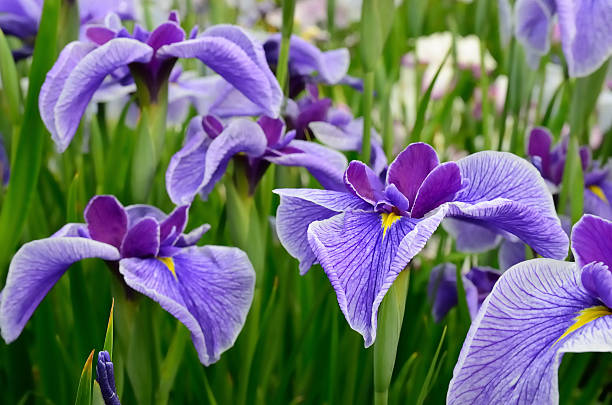


## <span style="color:#FF5733;">Importing the necessary libraries</span>

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pgo
from plotly.subplots import make_subplots
import plotly.colors as clrs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


## <span style="color:#FF5733;"> Import & Reading the Dataset </span>

In [276]:
data = pd.read_csv("Iris.csv",encoding = "latin1")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [277]:
df = data.copy()

In [278]:
df.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


## <span style="color:#FF5733;"> Dataset_details </span>

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* There is no null values present inside the data to impute.
* SepalLength is the columns with the details of flowers sepallength
* PetalLength is the columns with the details of flowers petallength
* Sepalwidth is the columns with the details of flowers sepalwidth
* Petalwidth is the columns with the details of flowers petalwidth
* Species columns denotes the Specification of the flower.

<span style = "color : purple"> **Summary statistics For numerical column values** </span>

In [280]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<span style = "color : purple"> **Summary statistics For Objective column values** </span>

In [281]:
df.describe(include = 'O')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


## <span style="color:#FF5733;">Dropping the unwanted columns </span>

In [282]:
df.drop(columns = ['Id'],axis = 1,inplace = True)

In [283]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## <span style="color:#FF5733;"> EDA - Exploratory Data Analysis </span>

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<Axes: >

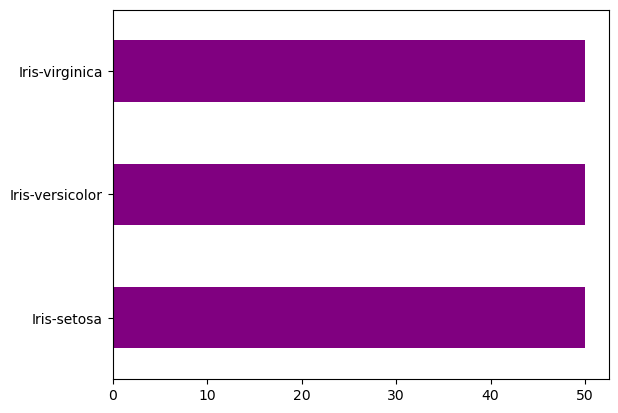

In [284]:
print(df["Species"].value_counts())
df["Species"].value_counts().plot.barh(color = 'purple')

Each species group having the same no. of attributes. 

### <code style="background:White;color:purple"> **Scatter Plot for determining the relationship factor for sepallength & sepalwidth** </code>

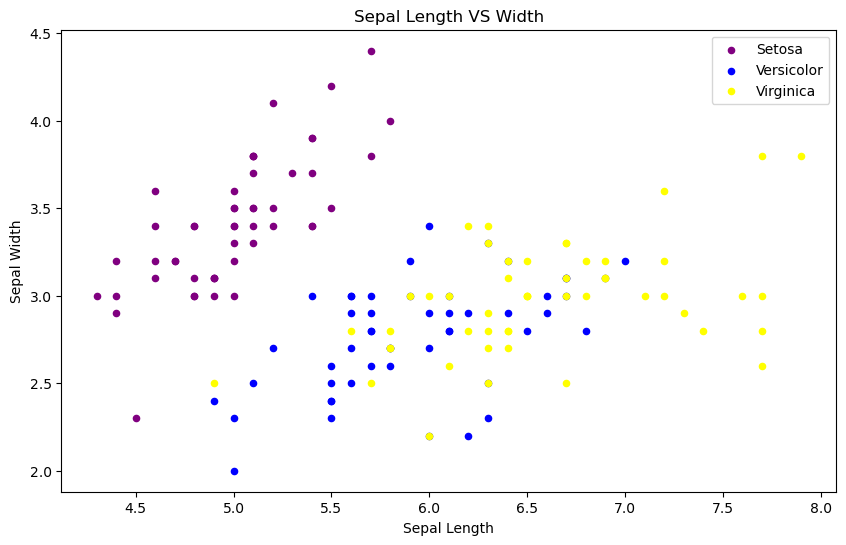

In [285]:
fig = df[df['Species']=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='purple', label='Setosa')
df[df['Species']=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax = fig)
df[df['Species']=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='Virginica',ax = fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### <code style="background:White;color:purple"> **Scatter Plot for determining the relationship factor for petallength & petalwidth** </code>

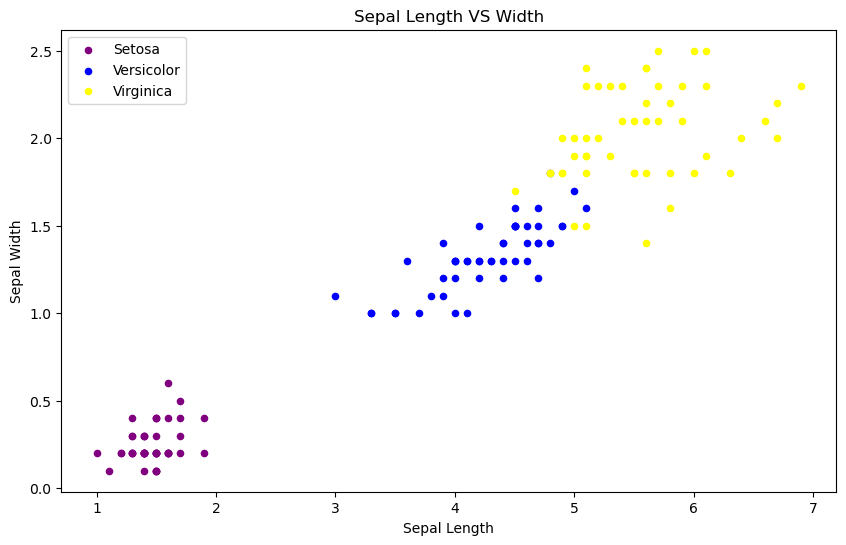

In [286]:
fig = df[df['Species']=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='purple', label='Setosa')
df[df['Species']=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax = fig)
df[df['Species']=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='yellow', label='Virginica',ax = fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### <code style="background:White;color:purple"> **Showing off how the Length and Width are gets varried** </code>

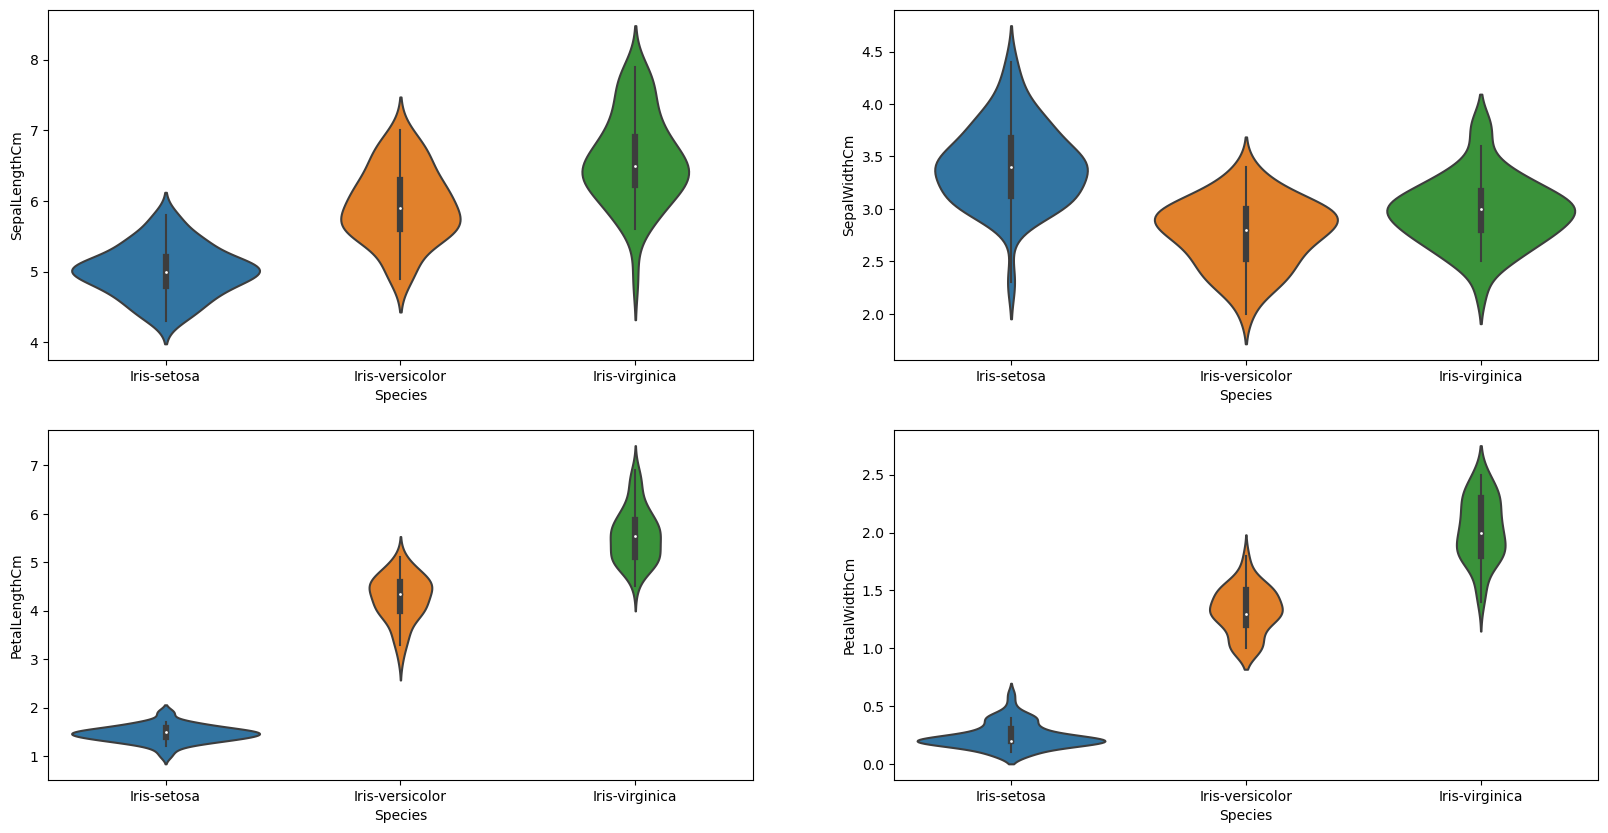

In [287]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

plt.show()

* This shows the density varies of  length and width
* The thinner part denotes that there is less density whereas the fatter part conveys higher density

### <code style="background:White;color:purple"> **Correlation plot to show how the Columns are corelatted with others** </code>

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


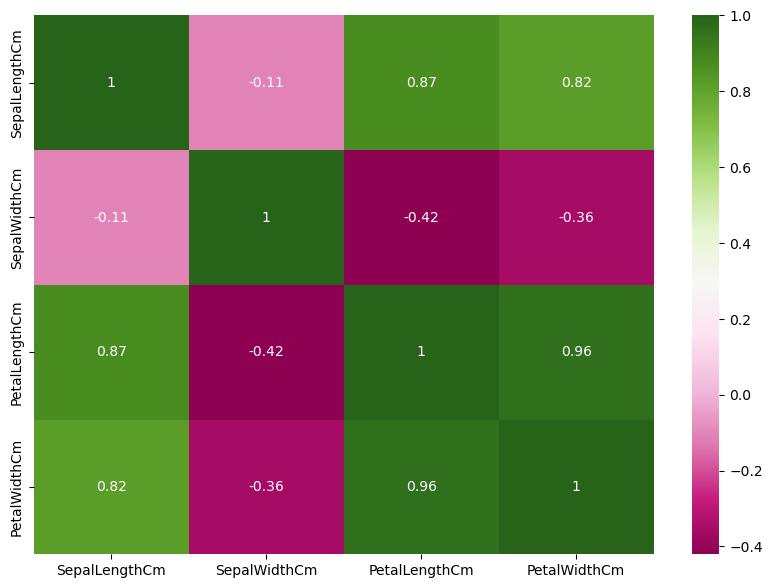

In [288]:
plt.figure(figsize=(10,7))
print(df.corr())
sns.heatmap(df.corr(),annot = True,cmap= 'PiYG')
plt.show()

* Sepallength and Sepalwidth are not corelated each others.
* Petallength and Petalwidth are highly correlated with each other.


## <span style="color:#FF5733;"> Faeturing and spliting the Dataset </span>

In [289]:
sp={
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

df['Species'].replace(sp,inplace=True)

In [290]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## <span style="color:purple;">Applying Train-Test Split & Applying Machine Learning Models, Evaluating Accuracy</span>

In [291]:
X = df.drop(columns='Species')
y = df['Species']




X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 , random_state  = 42)

In [292]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## <blockquote style="font-family:candara"><mark>Logistic Regression Classifier</mark></blockquote>

In [293]:
lr = LogisticRegression(random_state = 42)
model_lr = lr.fit(X_train,y_train)

In [294]:
predict_lr = model_lr.predict(X_test)
print(f"Logistic Regression:" ,accuracy_score(y_test,predict_lr))

Logistic Regression: 1.0


In [295]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Logistic regression accuracy score :",accuracy)

Logistic regression accuracy score : 1.0


## <blockquote style="font-family:candara"><mark>Support Vector Machine (SVM)</mark></blockquote>

In [296]:
sm =SVC(random_state = 42)
model_sm = sm.fit(X_train,y_train)

In [297]:
predict_sm = sm.predict(X_test)
print(f"svm classifier :", accuracy_score(y_test,predict_sm))

svm classifier : 1.0


In [298]:
y_pred = sm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"SVM classifier accuracy score :",accuracy)

SVM classifier accuracy score : 1.0


## <span style="color:#FF5733;"> Confusion matrix </span>

In [299]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(conf_matrix)
print(classification_rep)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



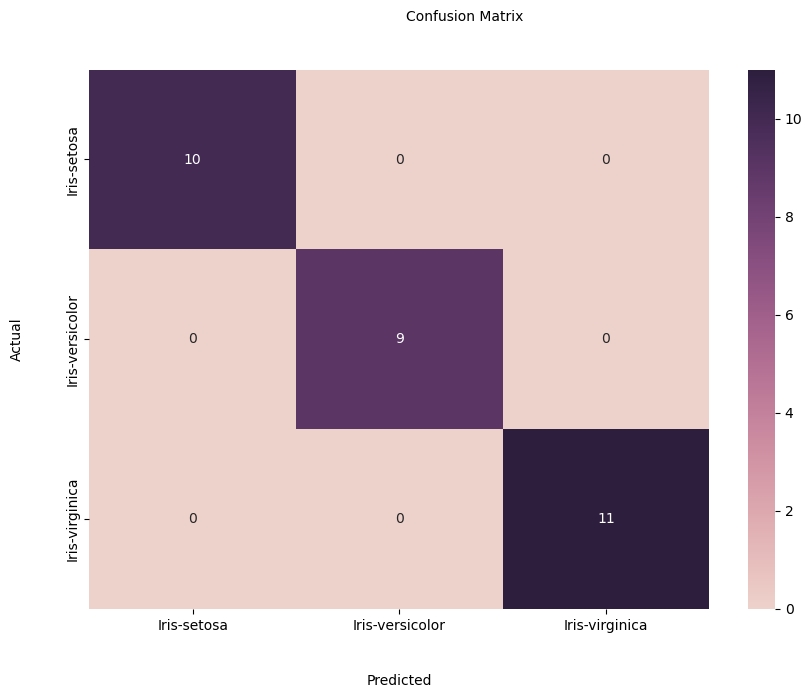

In [300]:
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True,cmap = sns.cubehelix_palette(as_cmap = True),cbar = True,
           xticklabels=class_names, yticklabels=class_names)
plt.figtext(0.5, 0.95, 'Confusion Matrix', ha='center')

plt.ylabel('Actual',labelpad=30)
plt.xlabel('Predicted',labelpad = 30)

plt.show()

## <span style="color:#FF5733;"> Cross_validating the best fit model </span>

In [302]:
lor = LogisticRegression()
k = 10
csv = cross_val_score(lor,X,y,cv = k)
print(csv.mean())

0.9733333333333334


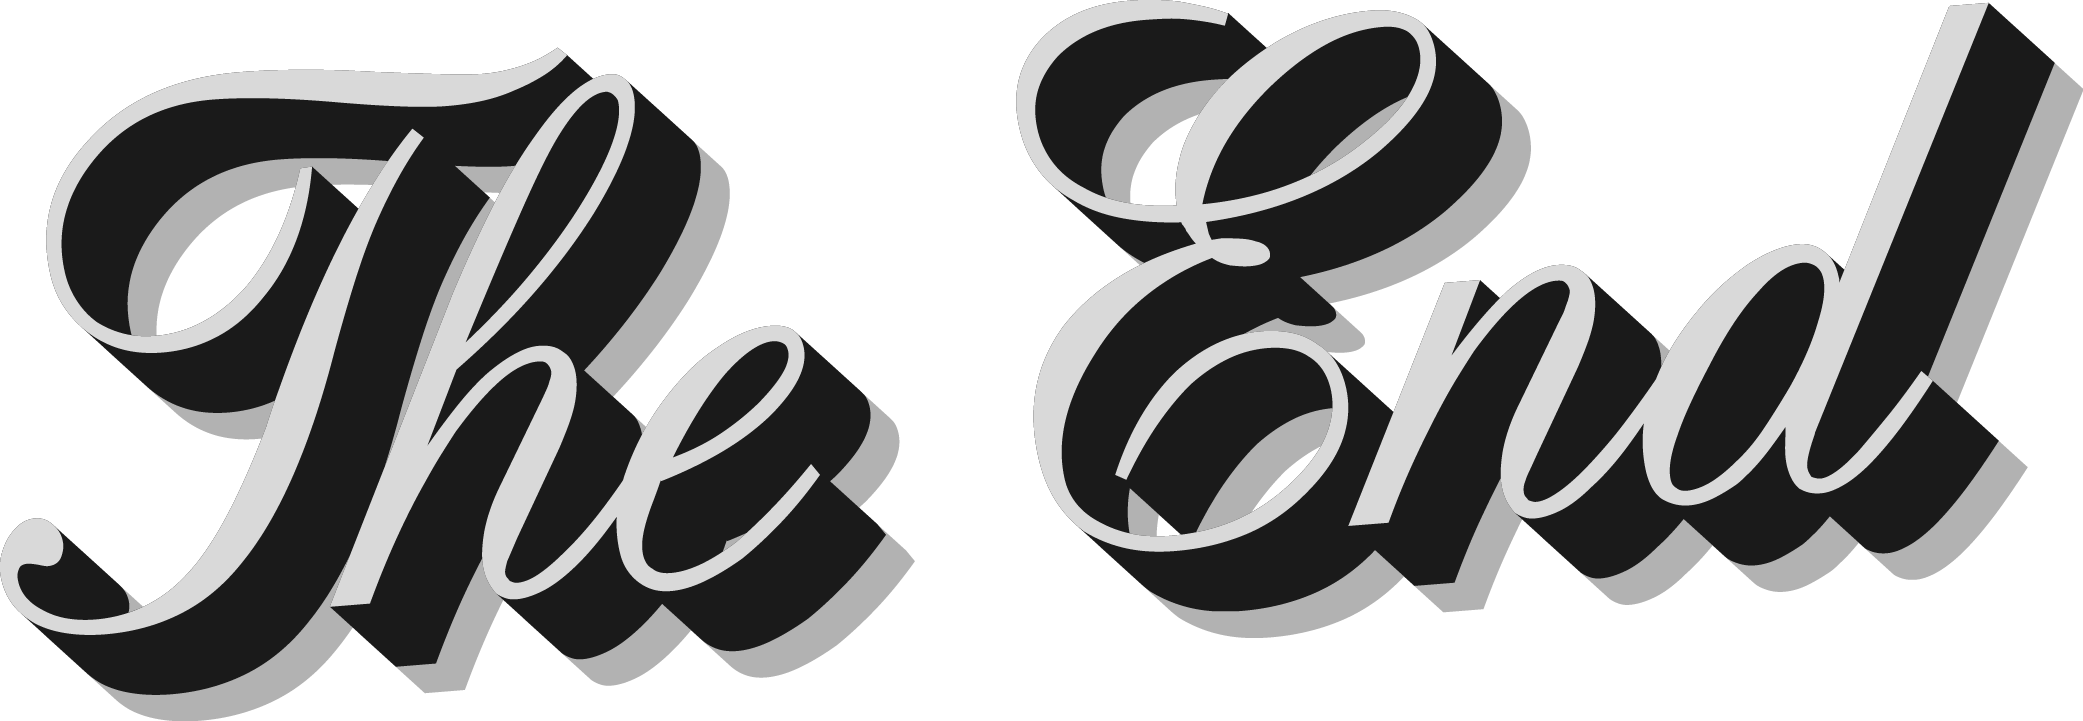